In [462]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import LeakyReLU
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

pd.options.mode.chained_assignment = None  # default='warn'

In [482]:
df=pd.read_csv('https://raw.githubusercontent.com/bbrandom91/KC_Housing/master/kc_house_data.csv'
              ,parse_dates=['date'],index_col='date'
              )
print(df.columns)
df=df.sort_index()
filter=(df['bedrooms']<7) & (df['bedrooms']>0)
df=df[filter]

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


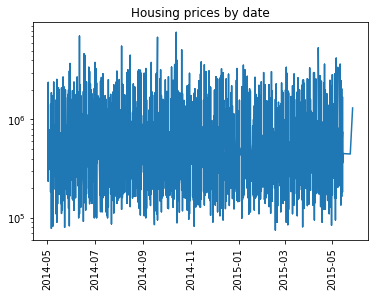

In [486]:
plt.plot(df.index,'price',data=df)
plt.yscale("log")
plt.title('Housing prices by date')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>

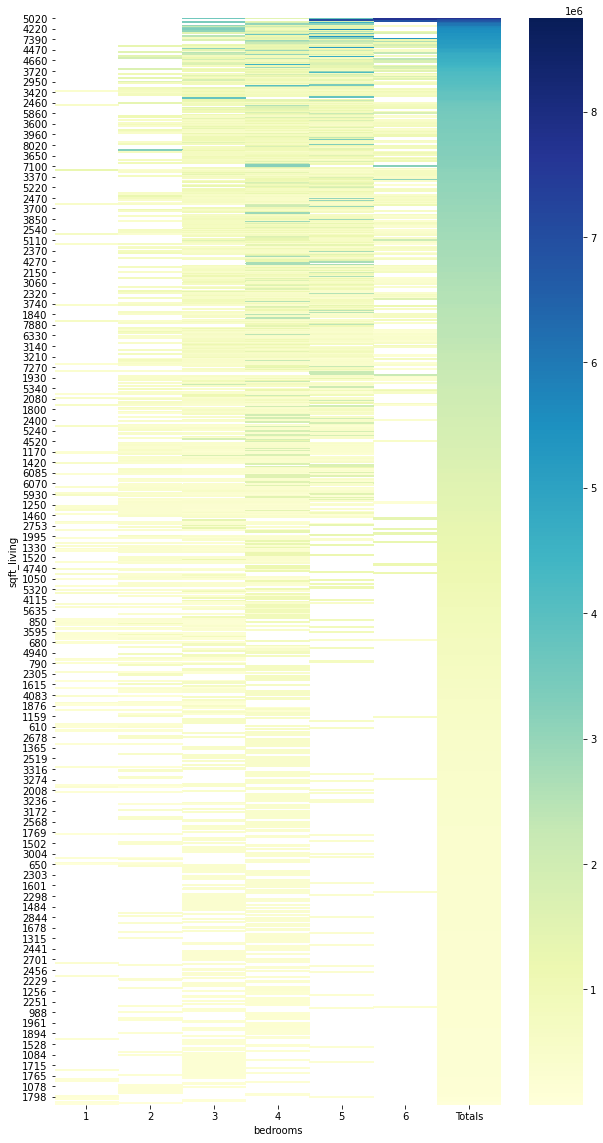

In [464]:
result=df.pivot_table(index='sqft_living',columns='bedrooms',values='price',aggfunc=np.mean)
result['Totals'] = result.sum(axis='columns')
result=result.sort_values(by='Totals',ascending=False)

fig,ax =plt.subplots(figsize=(10,20))
sns.heatmap(result, cmap="YlGnBu",ax=ax)
    

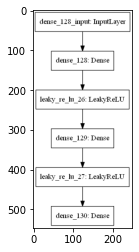

In [487]:
input_columns=['bedrooms','bathrooms','sqft_living','sqft_lot','yr_built','waterfront','zipcode']

model = Sequential()

#worked 1
#model.add(Dense(units=64,activation='relu',input_dim=2))
#model.add(Dropout(rate=0.3))
#model.add(Dense(units=32,activation='relu'))
#model.add(Dropout(rate=0.5))
#model.add(Dense(1))
#model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='mae', metrics=['mae'])

model.add(Dense(100, input_shape=(len(input_columns),)))
#model.add(Dense(100, kernel_initializer = "uniform",activation = "relu", input_dim=3))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='mae', metrics=['mae'])
# End your model with a Dense layer and no activation

#trial 1
#model.add(Dense(32,activation='relu', input_dim=3))
#model.add(Dense(32,activation='relu'))
#model.add(Dense(1,activation='sigmoid'))
#model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='mae', metrics=['mae'])



plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()


In [497]:

grouped=df.groupby(input_columns)['price'].agg({'median','mean'})
#median()
print(grouped)
#X=travel_df[['vendor','year','vendor_group','vendor_name']]
#y=travel_df['amount']
grouped=grouped.reset_index()
#print(grouped)
X=grouped[input_columns]
y=grouped['mean']


scaler = StandardScaler()
scaler.fit(X)
X2=scaler.transform(X)


                                                                mean  \
bedrooms sqft_living sqft_lot yr_built waterfront zipcode              
1        370         1801     1923     0          98117     276000.0   
         380         15000    1963     0          98168     245000.0   
         390         2000     1920     0          98103     245000.0   
         410         8636     1953     0          98146     325000.0   
         420         3298     1949     0          98136     229050.0   
...                                                              ...   
6        6980        15682    1999     0          98040    3100000.0   
         7100        18200    1933     0          98199    3200000.0   
         7390        24829    1991     1          98040    5300000.0   
         9890        31374    2001     0          98039    6885000.0   
         12050       27600    1910     0          98102    7700000.0   

                                                              m

In [489]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(X,y, epochs = 50,verbose=1)
#history=model.fit(X_train,y_train,  epochs = 600)

# Evaluate your model 
print("Final lost value:",model.evaluate(X2,y))

Epoch 1/50
21266/21266 [==============================] - 1s 47us/step - loss: 316142.2487 - mae: 316142.2500
Epoch 2/50
21266/21266 [==============================] - 1s 34us/step - loss: 218929.7374 - mae: 218929.7656
Epoch 3/50
21266/21266 [==============================] - 1s 33us/step - loss: 217829.7777 - mae: 217829.7812
Epoch 4/50
21266/21266 [==============================] - 1s 32us/step - loss: 217019.2117 - mae: 217019.0938
Epoch 5/50
21266/21266 [==============================] - 1s 32us/step - loss: 216138.4472 - mae: 216138.5938
Epoch 6/50
21266/21266 [==============================] - 1s 32us/step - loss: 215210.8533 - mae: 215210.9375
Epoch 7/50
21266/21266 [==============================] - 1s 32us/step - loss: 214272.3804 - mae: 214272.5000
Epoch 8/50
21266/21266 [==============================] - 1s 33us/step - loss: 213199.3476 - mae: 213199.2656
Epoch 9/50
21266/21266 [==============================] - 1s 32us/step - loss: 212015.0243 - mae: 212014.9062
Epoch 10/5

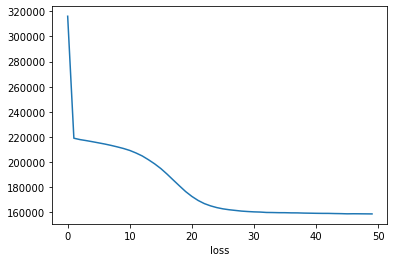

In [490]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('loss')
plt.show()

In [491]:
pred_cost = model.predict(X[input_columns])

#X2=X.copy()
X['predicted_amount']=[0]*len(X)
for index,item in enumerate(pred_cost):
    #rint(index,item)
    X['predicted_amount'].iloc[index]=float(item)

#print(X2)


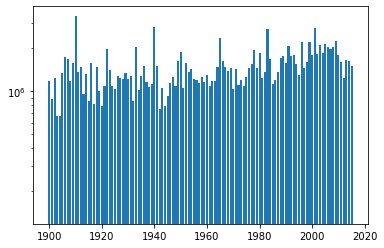

In [493]:
plt.bar(height='predicted_amount',x='yr_built', data=X)
plt.yscale('log')
plt.show()


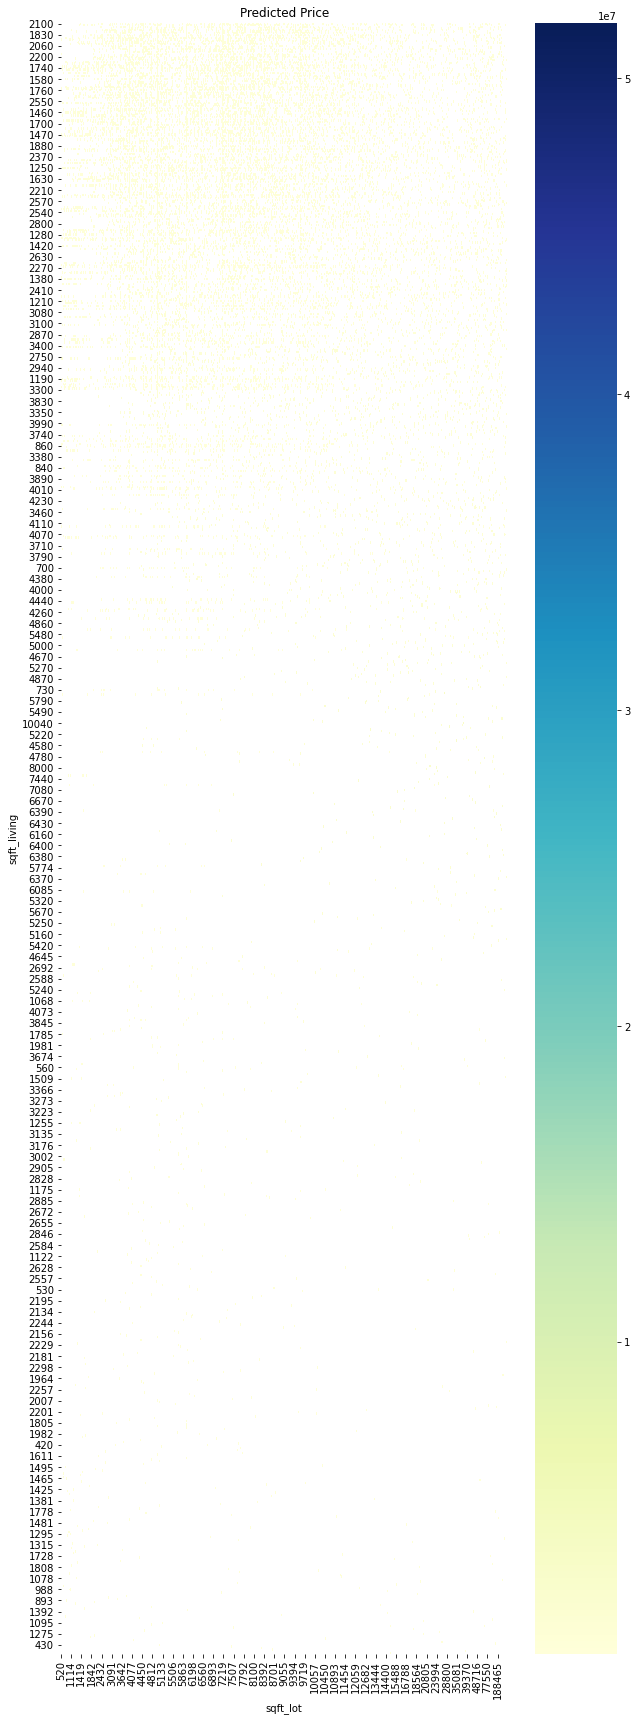

In [494]:
result=X.pivot_table(index='sqft_living',columns='sqft_lot',values='predicted_amount',aggfunc=np.median)
result['Totals'] = result.sum(axis='columns')
result=result.sort_values(by='Totals',ascending=False)
plt.figure(figsize=(10,30))
sns.heatmap(result,cmap="YlGnBu")
plt.title("Predicted Price")
plt.show()


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


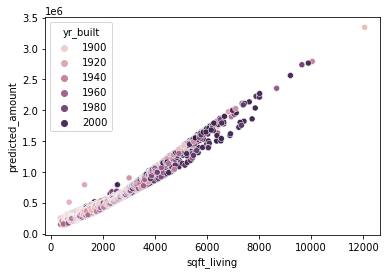

In [495]:
#print(X.head(3))
sns.scatterplot('sqft_living','predicted_amount',data=X,hue='yr_built')
plt.title('Predicted amount by sqft living and year build')
plt.show()
#X.plot(y='actual_amount_avg', color='purple')

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


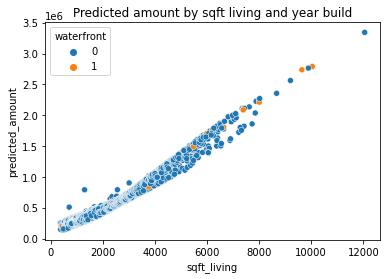

In [496]:
sns.scatterplot('sqft_living','predicted_amount',data=X,hue='waterfront')
plt.title('Predicted amount by sqft living and year build')
plt.show()
